In [8]:
import pandas as pd

In [9]:
titanic_data = pd.read_csv(r"C:\Users\guhan\Desktop\Titanic-Dataset.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

titanic_data = titanic_data.drop(columns=['Cabin'])

titanic_data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

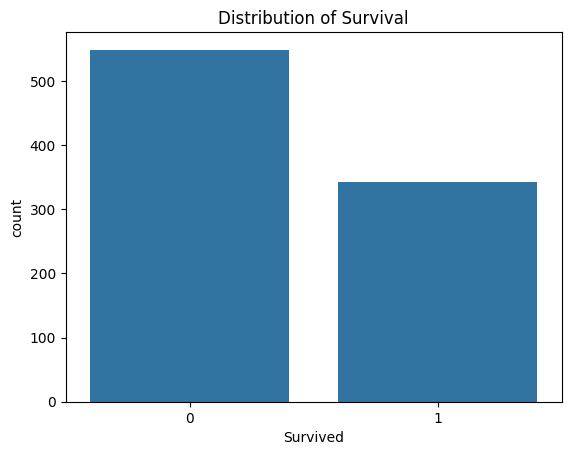

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=titanic_data, x='Survived')
plt.title('Distribution of Survival')
plt.show()

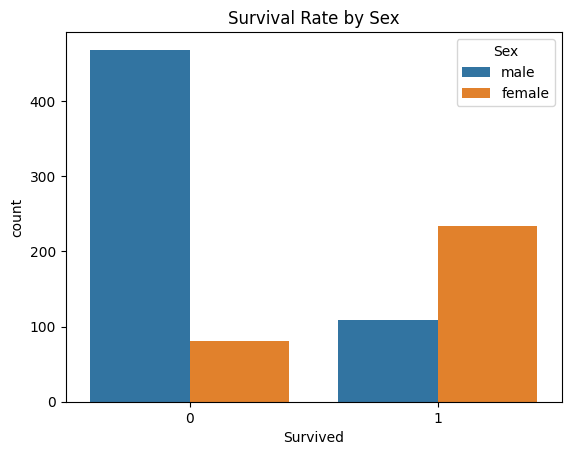

In [14]:
sns.countplot(data=titanic_data, x='Survived', hue='Sex')
plt.title('Survival Rate by Sex')
plt.show()

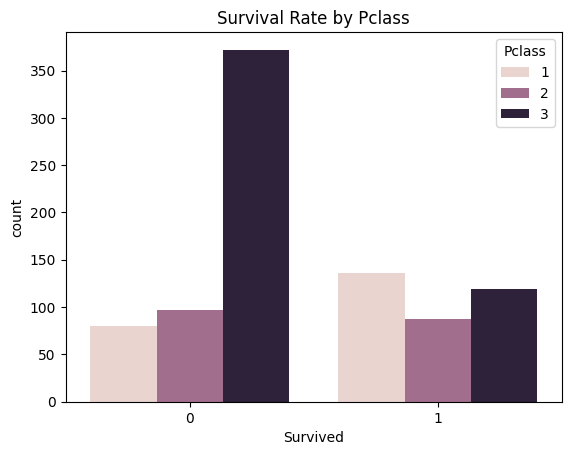

In [15]:
sns.countplot(data=titanic_data, x='Survived', hue='Pclass')
plt.title('Survival Rate by Pclass')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

X = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Accuracy:',accuracy)
print('Confusion Matrix:\n',conf_matrix)
print('Classification Report:\n',class_report)

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [20]:
feature_importance = pd.DataFrame({'Feature': X.columns,'Importance': model.coef_[0]}).sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
5,Fare,0.002534
2,Age,-0.030433
4,Parch,-0.111852
6,Embarked,-0.218777
3,SibSp,-0.293905
0,Pclass,-0.930680
1,Sex,-2.596994


### Feature Importance Interpretation

- **Sex** has the most significant negative coefficient, indicating that being male decreases the probability of survival.
- **Pclass** has the second most significant negative impact, meaning that higher classes (1st class) increase the probability of survival.
- **Fare** has a small positive coefficient, suggesting that higher fares are slightly associated with higher survival probabilities.